# K-Nearest Neighbors (KNN)
## O que é o KNN?

O K-Nearest Neighbors (KNN) é um algoritmo de aprendizado supervisionado amplamente utilizado para problemas de classificação e regressão. A ideia principal por trás do KNN é que dados similares existem em proximidade uns dos outros. Portanto, ele usa essa proximidade (ou distância) para fazer previsões sobre novos dados.
Intuição Básica do KNN

Imagine um cenário em que temos um conjunto de dados rotulados, e queremos classificar um novo ponto de dados. O algoritmo KNN busca os 'k' exemplos de treinamento mais próximos do novo ponto e faz uma previsão com base nesses vizinhos.

* Para Classificação: O KNN classifica um novo ponto de dados atribuindo a classe mais comum entre seus 'k' vizinhos mais próximos.
* Para Regressão: O KNN estima o valor de um novo ponto de dados tomando a média dos valores de seus 'k' vizinhos mais próximos.

## Como Funciona o KNN?

1. Escolha do valor de 'k':
    - O primeiro passo é decidir o número de vizinhos (k) a considerar. Um valor comum é começar com k=3 ou k=5, mas isso pode variar dependendo do problema.

2. Cálculo da Distância:
    - O KNN calcula a distância entre o novo ponto de dados e todos os pontos de treinamento. A distância Euclidiana é a mais usada, definida por:
    - d(x,y)=∑i=1n(xi−yi)2
    - d(x,y)=i=1∑n​(xi​−yi​)2

    * Onde xx e yy são dois pontos de dados e nn é o número de características.

    - Seleção dos 'k' Vizinhos Mais Próximos:
        - Após calcular a distância de todos os pontos de treinamento, o KNN seleciona os 'k' vizinhos mais próximos.

    - Classificação/Regressão:
        * Classificação: O novo ponto é classificado de acordo com a classe majoritária dos 'k' vizinhos.
        Regressão: O valor é predito como a média dos valores dos 'k' vizinhos.

## Método do Cotovelo para Escolha de 'k'

A escolha de 'k' é crucial para o desempenho do KNN. Um valor muito baixo de 'k' pode levar a um modelo muito sensível ao ruído (overfitting), enquanto um valor muito alto pode suavizar demais as fronteiras de decisão (underfitting).

- Método do Cotovelo: Para encontrar o 'k' ideal, podemos plotar a taxa de erro de validação cruzada contra diferentes valores de 'k'. O ponto em que a taxa de erro começa a diminuir menos significativamente indica o valor de 'k' ideal.

In [201]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [202]:
# Passo 1: Gerando um conjunto de dados fictício de duas classes para exemplo
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)

In [203]:
# Passo 2: Dividindo os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [204]:
# Passo 3: Definindo o valor de K (número de vizinhos) inicial
k = 5

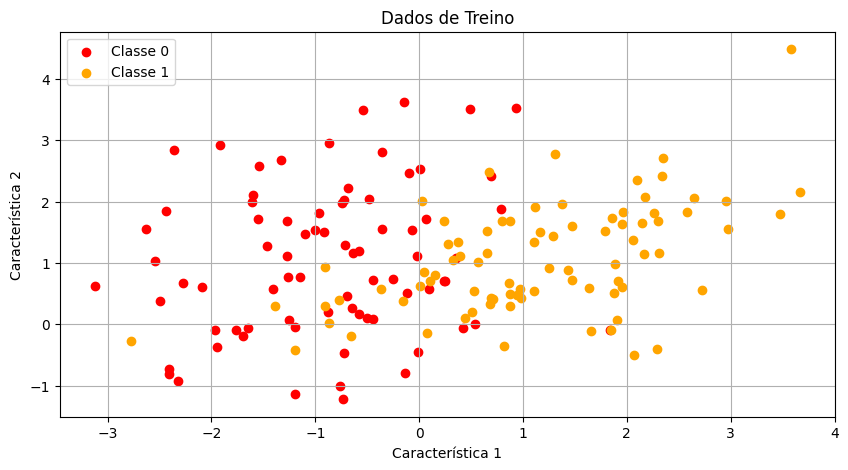

In [205]:
# Passo 4: Visualizando os dados de treino
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.title('Dados de Treino')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

In [206]:
# Passo 5: Treinando o modelo KNN com o conjunto de treino
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [207]:
# Passo 6: Escolhendo um ponto de teste aleatório
random_index = np.random.randint(0, len(X_test))
test_point = X_test[random_index]
true_class = y_test[random_index]  # Classe verdadeira do ponto de teste

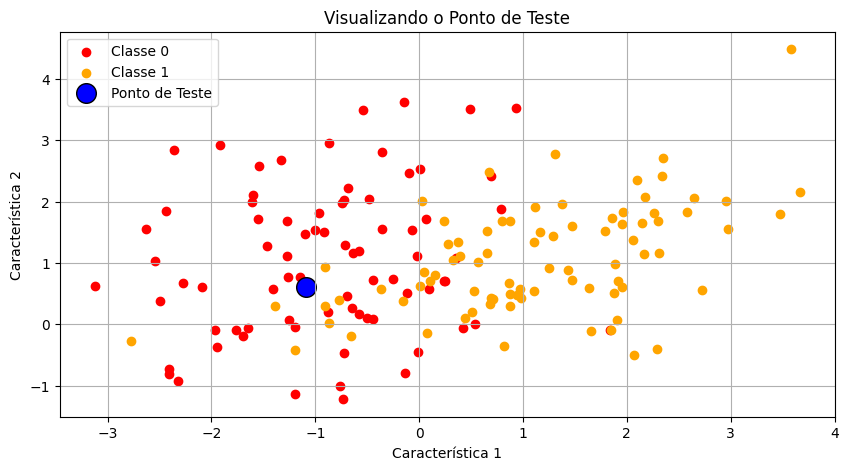

In [208]:
# Passo 7: Visualizando o ponto de teste
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, label='Ponto de Teste')
plt.title('Visualizando o Ponto de Teste')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()

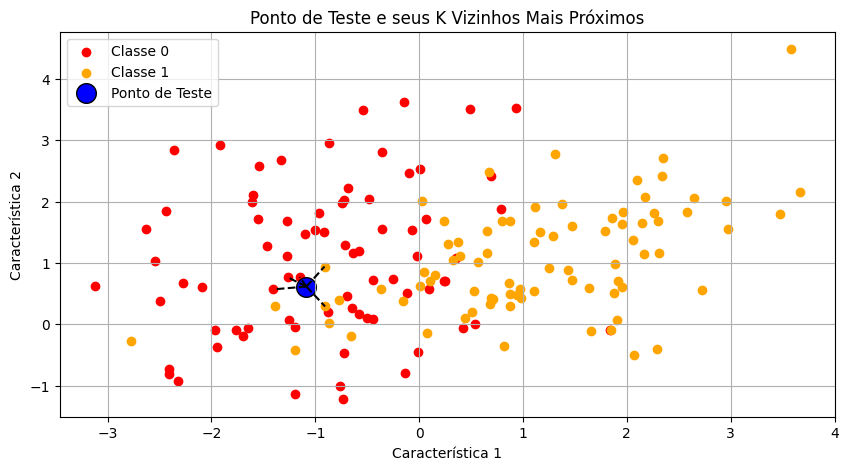

In [209]:
# Passo 8: Encontrando os K vizinhos mais próximos do ponto de teste
neighbors = knn.kneighbors([test_point], return_distance=False)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, label='Ponto de Teste')
for neighbor in neighbors[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title('Ponto de Teste e seus K Vizinhos Mais Próximos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()



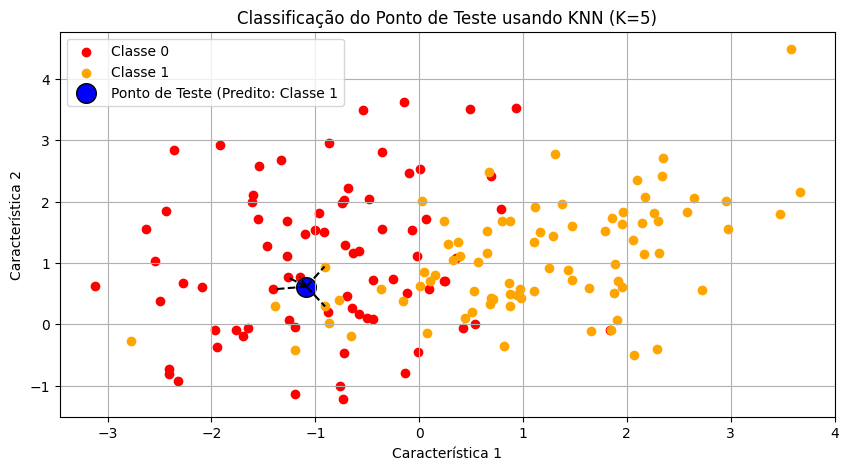

In [210]:
# Passo 9: Classificando o ponto de teste com base nos vizinhos
y_pred_single = knn.predict([test_point])

# Mostrar a classificação final e a classe verdadeira
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, 
            label=f'Ponto de Teste (Predito: {"Classe 0" if y_pred_single[0] == 1 else "Classe 1"}')
for neighbor in neighbors[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title(f'Classificação do Ponto de Teste usando KNN (K={k})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()



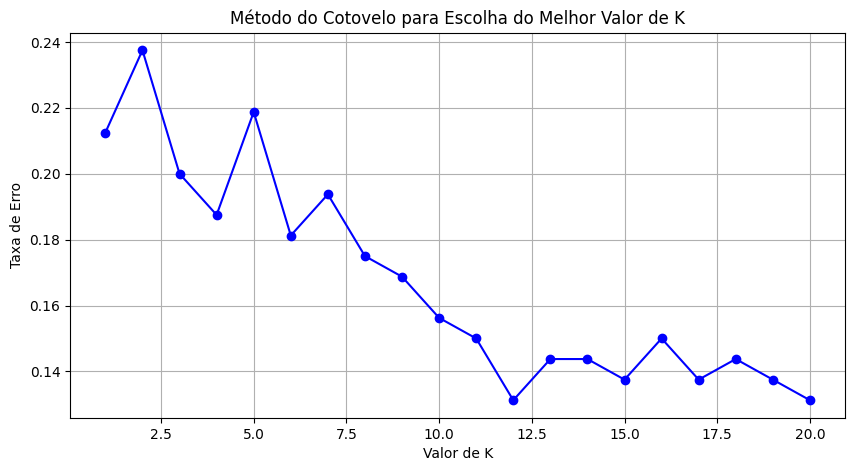

In [211]:
# Passo 10: Usando o Método do Cotovelo para determinar o melhor valor de 'k'
error_rates = []
k_values = range(1, 21)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    error_rates.append(1 - scores.mean())

# Plotando o gráfico do Método do Cotovelo
plt.figure(figsize=(10, 5))
plt.plot(k_values, error_rates, marker='o', linestyle='-', color='blue')
plt.title('Método do Cotovelo para Escolha do Melhor Valor de K')
plt.xlabel('Valor de K')
plt.ylabel('Taxa de Erro')
plt.grid(True)
plt.show()



In [212]:
# Passo 11: Escolhendo o melhor valor de 'k' baseado no Método do Cotovelo
best_k = k_values[np.argmin(error_rates)]
print(f"O melhor valor de 'k' baseado no Método do Cotovelo é: {best_k}")



O melhor valor de 'k' baseado no Método do Cotovelo é: 12


In [213]:
# Passo 12: Re-treinando o modelo com o melhor valor de 'k'
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train, y_train)

# Avaliação do modelo atualizado no conjunto de teste
accuracy = knn_best.score(X_test, y_test)
print(f"Acurácia do modelo KNN com k={best_k} no conjunto de teste: {accuracy:.2f}")



Acurácia do modelo KNN com k=12 no conjunto de teste: 0.85


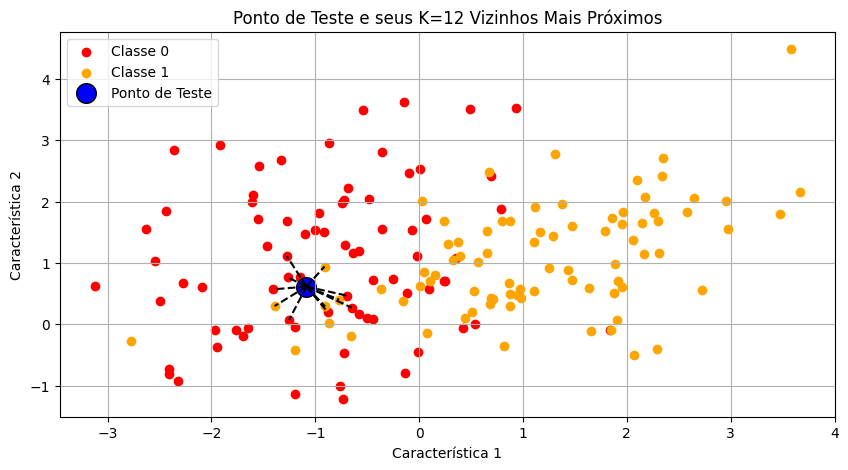

In [214]:
# Passo 13: Visualizando novamente o ponto de teste com o melhor valor de 'k'
neighbors_best = knn_best.kneighbors([test_point], return_distance=False)

plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, label='Ponto de Teste')
for neighbor in neighbors_best[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title(f'Ponto de Teste e seus K={best_k} Vizinhos Mais Próximos')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()



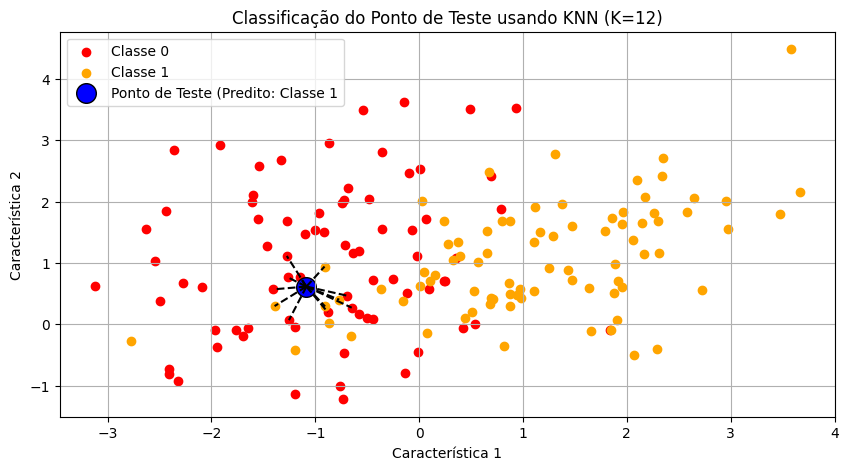

In [215]:
# Passo 14: Classificando o ponto de teste com o melhor valor de 'k'
y_pred_single_best = knn_best.predict([test_point])

# Mostrar a classificação final e a classe verdadeira com o melhor valor de 'k'
plt.figure(figsize=(10, 5))
plt.scatter(X_train[y_train == 0][:, 0], X_train[y_train == 0][:, 1], color='red', label='Classe 0')
plt.scatter(X_train[y_train == 1][:, 0], X_train[y_train == 1][:, 1], color='orange', label='Classe 1')
plt.scatter(test_point[0], test_point[1], color='blue', edgecolor='black', marker='o', s=200, 
            label=f'Ponto de Teste (Predito: {"Classe 0" if y_pred_single_best[0] == 1 else "Classe 1"}')
for neighbor in neighbors_best[0]:
    plt.plot([test_point[0], X_train[neighbor][0]], [test_point[1], X_train[neighbor][1]], 'k--')
plt.title(f'Classificação do Ponto de Teste usando KNN (K={best_k})')
plt.xlabel('Característica 1')
plt.ylabel('Característica 2')
plt.legend()
plt.grid(True)
plt.show()
